**Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a 
predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Hypothesis Generation**

1. The Item with more visibility could have more sale.The item that are more visible to customer are more likely to be purchased. 
2. The item weight might or might not affect the item sale.
3. The Outelt size can affect the item sale. Larger the outlet size larger will be the variety of item available in that outlet and in large amount.
4. Item that are established earlier can have more sales.
5. Item MRP does affect the sale of an item.
6. Item sale might depend on the location of the outlet.
7. The type of outlet could affect the item sale.As we see particular item is not available in all the outlet but in specific outlet type.


**Loading Packages and Data**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor

**Importing the data**

In [62]:
df_test=pd.read_csv('D:\Internship\Test.csv')
df_train=pd.read_csv('D:\Internship\Train.csv')

In [63]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [65]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


The train dataset contains 8523 rows and 12 columns.The test dataset contains 5681  rows and 11 columns.

In [66]:
train_columns=list(df_train.columns)
test_columns=list(df_test.columns)
print("Train dataset columns")
for i in train_columns:
    print(i)

Train dataset columns
Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


In [67]:
print("Test dataset columns")
for i in test_columns:
    print(i)

Test dataset columns
Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type


**Exploring the dataset**

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [69]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [70]:
print(df_train.duplicated().any())
print(df_test.duplicated().any())

False
False


In [71]:
Item_Fat_Content=df_train['Item_Fat_Content'].unique()
Item_Type=df_train['Item_Type'].unique()
Outlet_Identifier=df_train['Outlet_Identifier'].unique()
Outlet_Size=df_train['Outlet_Size'].unique()
Outlet_Location_Type=df_train['Outlet_Location_Type'].unique()
Outlet_Type=df_train['Outlet_Type'].unique()
print(Item_Fat_Content)
print(Item_Type)
print(Outlet_Identifier)
print(Outlet_Size)
print(Outlet_Location_Type)
print(Outlet_Type )

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [73]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Numerical feature**
1. Item_Weight 
2. Item_Visibility
3. Item_MRP
4. Item_Outlet_Sales (Target Feature)
**Categorical feature**
1. Item_Identifier  
2. Item_Fat_Content
3. Item_Type  
4. Outlet_Identifier
5. Outlet_Establishment_Year
6. Outlet_Size  
7. Outlet_Location_Type   
8. Outlet_Type 
- There are 4 float type features, 1 integer type and 7 object type.
- We can consider Outlet_Establishment_Year as the categorical feature as it contains some fixed value that is the year.
- The features like Item_fat_content,Outlet_Size,Outlet_Location_type and Outlet_Type are ordinal feature as the values they contain can be arranged in some order

**Missing Values**
1. Train dataset
- 'Item Weight' column contain 17.17% of missing values.
- 'Outlet Size' column contain 28.28% of missing values.
2. Test Dataset
- 'Item Weight' column contain 17.18% of missing values.
- 'Outlet Size' column contain 28.27% of missing values.

The dataset does not conatin any duplicate value/row.

**Data Cleaning**

**1. Fixing Inconsistent Data Entry**

In [74]:
df_train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df_test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [75]:
print(df_train['Item_Fat_Content'].unique())
print(df_test['Item_Fat_Content'].unique())

['Low Fat' 'Regular']
['Low Fat' 'Regular']


**2. How to treat missing values?**

Text(0.5, 1.0, 'Test Date')

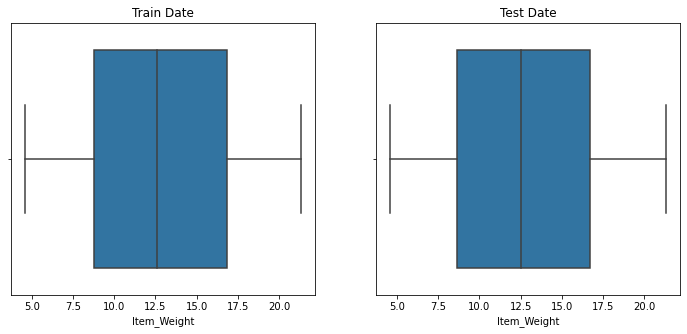

In [76]:
fig,axes=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.boxplot(x='Item_Weight',data=df_train,ax=axes[0])
axes[0].set_title('Train Date')
sns.boxplot(x='Item_Weight',data=df_test,ax=axes[1])
axes[1].set_title('Test Date')

- The training as well as test dataset 'Item_Weight' column does not contain any outlier so we can impute missing values using 'mean'.

 **Exploratory Data Analysis**

**1. Univariate Analysis**

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


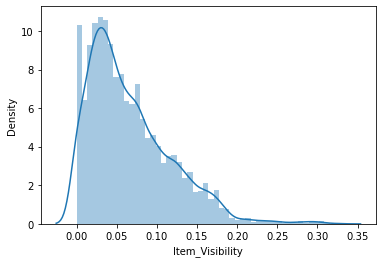

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


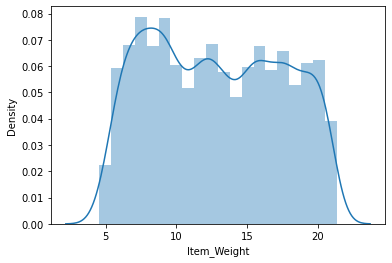

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


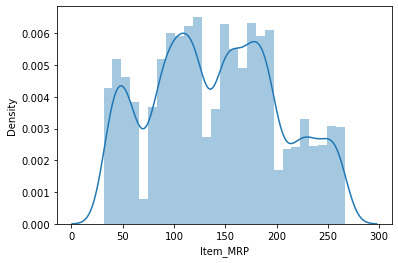

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

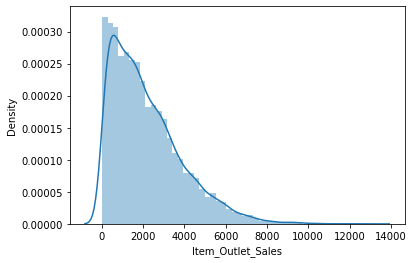

In [77]:
sns.distplot(df_train['Item_Visibility'])
plt.show()
sns.distplot(df_train['Item_Weight'])
plt.show()
sns.distplot(df_train['Item_MRP'])
plt.show()
sns.distplot(df_train['Item_Outlet_Sales'])


In [78]:
def Univariate_Analysis(col_name,dataset_name):
    plt.figure(figsize=(7,5))
    value=df_train[col_name].value_counts(ascending=False).values
    fig=sns.countplot(x=col_name,data=dataset_name,palette="BuGn_r",order=dataset_name[col_name].value_counts().index)
    fig.bar_label(container=fig.containers[0],labels=value)
    plt.ylabel("Count",fontsize=12)
    plt.xlabel(col_name,fontsize=12)
    plt.title("Value Counts {0}".format(col_name),fontsize=14)

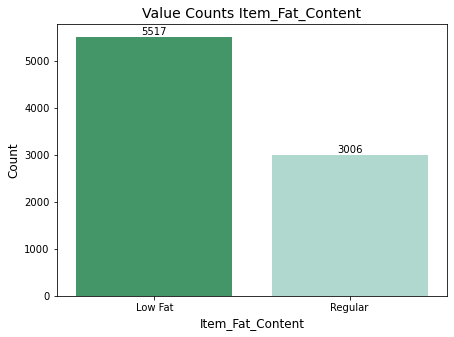

In [79]:
Univariate_Analysis('Item_Fat_Content',df_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Soft Drinks'),
  Text(9, 0, 'Meat'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

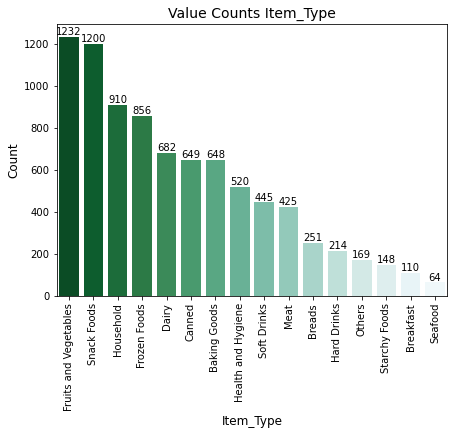

In [80]:
Univariate_Analysis('Item_Type',df_train)
plt.xticks(rotation=90)

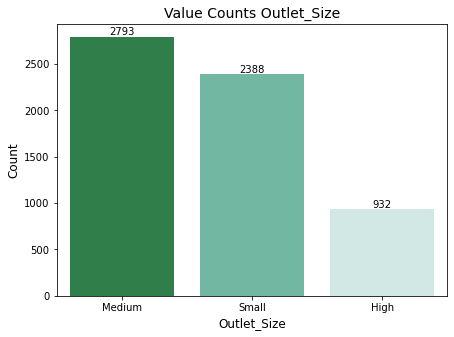

In [81]:
Univariate_Analysis('Outlet_Size',df_train)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

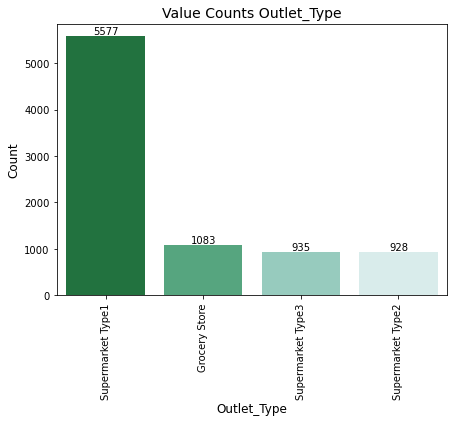

In [82]:
Univariate_Analysis('Outlet_Type',df_train)
plt.xticks(rotation=90)

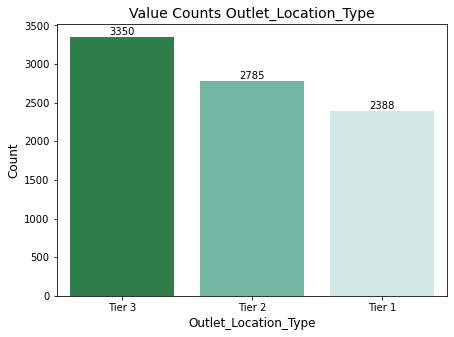

In [83]:
Univariate_Analysis('Outlet_Location_Type',df_train)

**Observation**
1. There are 10 outlets.
2. Product with 'Low Fat' content were purchased more.
3. Most of the product purchased are from 'medium' size outlet.
4. Most of the product purchased are from 'Supermarket Type 1' outlet type.
5. 'Fruit & Vegetable' as well as 'Snack Food' product were purchased more.
6. Most of the product are purchased from 'Tier 3' outlet location type.
7. 'Seafood' product are purchased less.
8. There are some item that are not visible at all with visibility 0.000000.
9. The item MRP ranges between 31-267.
10. The item weight ranges between 4-22.

**2. Bivariate Analysis**

In [84]:
def relation_plot(col_name):
    sns.lmplot(y=col_name,x='Item_Outlet_Sales',data=df_train,line_kws={'color': 'red'})
    plt.title("Realtion between {0} and Item_Outlet_Sales".format(col_name))
    plt.xlabel('Item Outlet Sales')
    plt.ylabel(col_name)

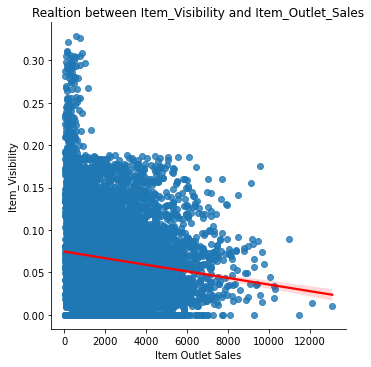

In [85]:
relation_plot('Item_Visibility')

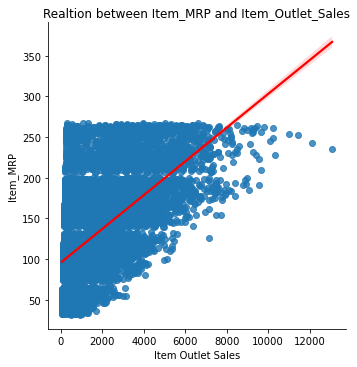

In [86]:
relation_plot('Item_MRP')

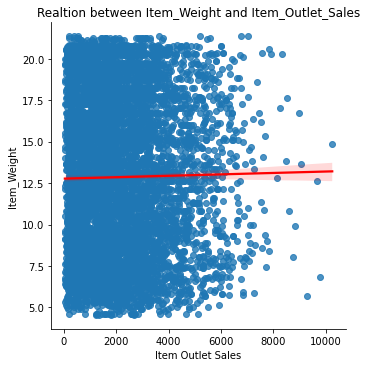

In [87]:
relation_plot('Item_Weight')

In [88]:
numerical_features=df_train.select_dtypes(include=['int64','float64'])
print(numerical_features.columns)

numerical_features.corr(method='pearson')

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

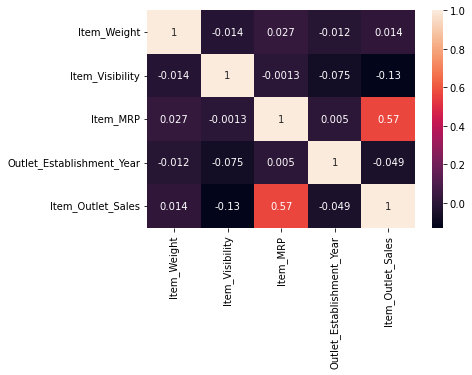

In [89]:
sns.heatmap(numerical_features.corr(method='pearson'),cbar=True,annot=True)

**Observation**
1. There is positive correlation between 'Item MRP' and 'Item Outlet Sales'.
2. There is no realtion between 'Item Weight' and 'Item Outlet Sales'.
3. There is slight negative relation between 'Item Visibility' and 

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.02, 'Total sales of item with different fat content')

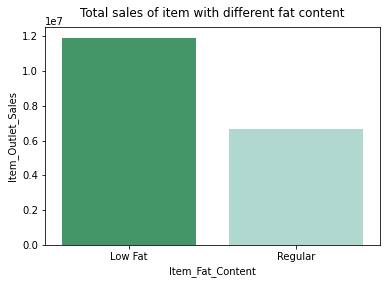

In [90]:
df_sales=df_train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(df_sales.index,df_sales,palette="BuGn_r")
plt.title('Total sales of item with different fat content',y=1.02)

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.02, 'Total sales of different Outlet Size')

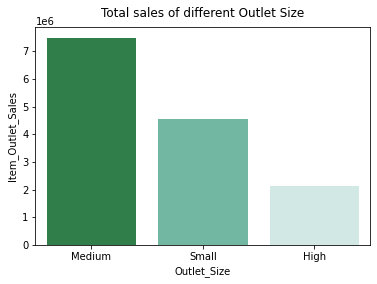

In [91]:
df_sales0=df_train.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(df_sales0.index,df_sales0,palette='BuGn_r')
plt.title('Total sales of different Outlet Size',y=1.02)

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Starchy Foods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

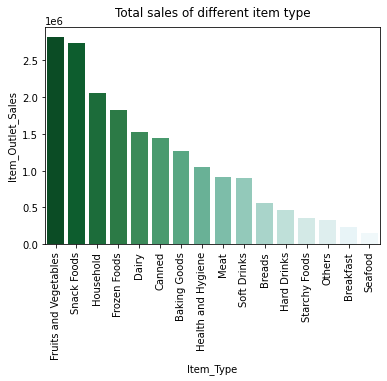

In [92]:
df_sales1=df_train.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(df_sales1.index,df_sales1,palette="BuGn_r")
plt.title('Total sales of different item type',y=1.02)
plt.xticks(rotation=90)

In [93]:
df_sales2=df_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales']
df_sales2.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Establishment_Year,,,,,,,,
1985,1463.0,2483.677474,2347.516621,33.9558,399.48000,1845.5976,3968.16800,13086.9648
1987,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
1997,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362
1998,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
1999,930.0,2348.354635,1513.289464,111.8544,1182.79370,1966.1074,3281.72820,7646.0472
2002,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
2004,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
2007,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
2009,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228


In [94]:
df_train.Outlet_Establishment_Year.groupby(df_train.Outlet_Identifier).apply(np.array).apply(lambda x: np.unique(x))

Outlet_Identifier
OUT010    [1998]
OUT013    [1987]
OUT017    [2007]
OUT018    [2009]
OUT019    [1985]
OUT027    [1985]
OUT035    [2004]
OUT045    [2002]
OUT046    [1997]
OUT049    [1999]
Name: Outlet_Establishment_Year, dtype: object

In [95]:
df_sales3=df_train.groupby('Outlet_Identifier')['Item_Outlet_Sales']
df_sales3.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [96]:
print(df_train.Outlet_Identifier.groupby(df_train.Outlet_Size).apply(np.array).apply(lambda x: np.unique(x)))
df_train.Outlet_Identifier.groupby(df_train.Outlet_Type).apply(np.array).apply(lambda x: np.unique(x))

Outlet_Size
High                      [OUT013]
Medium    [OUT018, OUT027, OUT049]
Small     [OUT019, OUT035, OUT046]
Name: Outlet_Identifier, dtype: object


Outlet_Type
Grocery Store                                        [OUT010, OUT019]
Supermarket Type1    [OUT013, OUT017, OUT035, OUT045, OUT046, OUT049]
Supermarket Type2                                            [OUT018]
Supermarket Type3                                            [OUT027]
Name: Outlet_Identifier, dtype: object

**Observation**
1. The total sales made by item with 'low fat' content are more.
2. The total sales made by outlet with 'medium' is more as the most of the product was purchased from the same outlet type.
3. The sale made by 'fruits and vegetable' product and 'snack food' is the most and sale made by selling 'seafood' is least.
4. The sale count of all the outlet established in different year are almost same except for the outlet that were established in year '1985' most sale count and '1988' least sale count. This was because in 1985 there were two outlet established so the it was combine sale count of two outlets.
5. The sale count of different outlet are almost same except outlet 'OUT010' and 'OUT019'.The sale count of this two outlet is less as compare to other because this two outlet are of 'grocery store' and outlet size is 'small'.

As we are considering the 'Outlet_Establishment_Year' as categorical feature there is need to change the data type of the column.

In [97]:
df_train['Outlet_Establishment_Year']=df_train['Outlet_Establishment_Year'].astype('str')

**Feature Engineering**

**1. Preprocessing Data**
- Item_Visibility

In [98]:
df_train['Item_Visibility'].replace(to_replace=0.000000,value=np.nan,inplace=True)
df_train['Item_Visibility']=df_train['Item_Visibility'].fillna(df_train.groupby('Item_Identifier')['Item_Visibility'].transform('median'))

**2. Treating Missing Values**
- Item_Weight

In [99]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

- Outlet_Size

In [100]:
check=pd.crosstab(df_train['Outlet_Size'],df_train['Outlet_Type'])
check

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [101]:
check2=pd.crosstab(df_train['Outlet_Size'],df_train['Outlet_Location_Type'])
check2

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [102]:
imputing={'Grocery Store':'Small'}
x=df_train['Outlet_Type'].map(imputing)
df_train['Outlet_Size']=df_train['Outlet_Size'].combine_first(x)

imputing1={'Tier 2':'Small'}
x1=df_train['Outlet_Location_Type'].map(imputing1)
df_train['Outlet_Size']=df_train['Outlet_Size'].combine_first(x1)

**Label Encoding**

In [103]:
train=df_train.copy()
label_encoded_feature=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year']
Encoder=LabelEncoder()
for i in label_encoded_feature:
    train[i]=Encoder.fit_transform(train[i])

**OneHotEnconding**

In [104]:
train=pd.concat([train,pd.get_dummies(train[['Outlet_Identifier']])],axis=1)
train=pd.concat([train,pd.get_dummies(train[['Item_Type']])],axis=1)

In [105]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,8,1,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,4,1,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,1,0.022934,Fruits and Vegetables,182.0950,OUT010,3,2,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.013254,Household,53.8614,OUT013,1,0,2,...,0,0,0,1,0,0,0,0,0,0


In [106]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      

**Feature Selection**

In [107]:
features=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']
y=train['Item_Outlet_Sales']
X=train[features]

**Splitting into train and test data**

In [108]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [109]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
6404,9.210,0,0.008722,123.5414,0,1,2,3,0,0,...,1,0,0,0,0,0,0,0,0,0
5820,18.700,0,0.014623,52.0324,5,2,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
48,15.850,1,0.121633,60.6220,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4583,5.155,0,0.145670,247.2776,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3791,21.000,0,0.049296,194.4478,6,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**Model Building and Validation**

**1. Linear Regression**

In [110]:
Model_1=LinearRegression()
Model_1.fit(X_train,y_train)
prediction_1=Model_1.predict(X_valid)
print('Mean Absolute Error: ',mean_absolute_error(y_valid,prediction_1))
print('RMSE: ',np.sqrt(mean_squared_error(y_valid,prediction_1)))
print('Accuracy: {}%'.format(round(Model_1.score(X_valid,y_valid)*100,2)))

Mean Absolute Error:  852.2133441656003
RMSE:  1131.7846926207535
Accuracy: 56.24%


**2. RandomForestRegressor**

In [111]:
Estimator=[50,100,200,300,400,500]
def RandomForestRegression(estimator):
    Model_2=RandomForestRegressor(n_estimators=estimator)
    Model_2.fit(X_train,y_train)
    prediction_2=Model_2.predict(X_valid)
    print("Number of Estimator: ",estimator)
    print('Mean Absolute Error: ',mean_absolute_error(y_valid,prediction_2))
    print('RMSE: ',np.sqrt(mean_squared_error(y_valid,prediction_2)))
    print('Accuracy: {}%'.format(round(Model_2.score(X_valid,y_valid)*100,2)))

for i in Estimator:
    RandomForestRegression(i)

Number of Estimator:  50
Mean Absolute Error:  813.6995858346041
RMSE:  1136.95052824445
Accuracy: 55.83%
Number of Estimator:  100
Mean Absolute Error:  806.9139552938416
RMSE:  1127.6419961306094
Accuracy: 56.55%
Number of Estimator:  200
Mean Absolute Error:  806.8210869325513
RMSE:  1130.9982870669048
Accuracy: 56.3%
Number of Estimator:  300
Mean Absolute Error:  803.4599033450637
RMSE:  1125.058909322088
Accuracy: 56.75%
Number of Estimator:  400
Mean Absolute Error:  803.8458688416425
RMSE:  1126.0173838011563
Accuracy: 56.68%
Number of Estimator:  500
Mean Absolute Error:  805.0591466144283
RMSE:  1128.5328344175762
Accuracy: 56.49%


**3. XGBoost**

In [112]:
Model_3=XGBRegressor(n_estimators=1000,learning_rate=0.01)
Model_3.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_valid,y_valid)],verbose=False)
prediction_3=Model_3.predict(X_valid)
print('Mean Absolute Error: ',mean_absolute_error(y_valid,prediction_3))
print('RMSE: ',np.sqrt(mean_squared_error(y_valid,prediction_3)))
print('Accuracy: {}%'.format(round(Model_3.score(X_valid,y_valid)*100,2)))

C:\Users\sunny\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error:  771.9527544446267
RMSE:  1098.1718939668465
Accuracy: 58.8%



**Results**

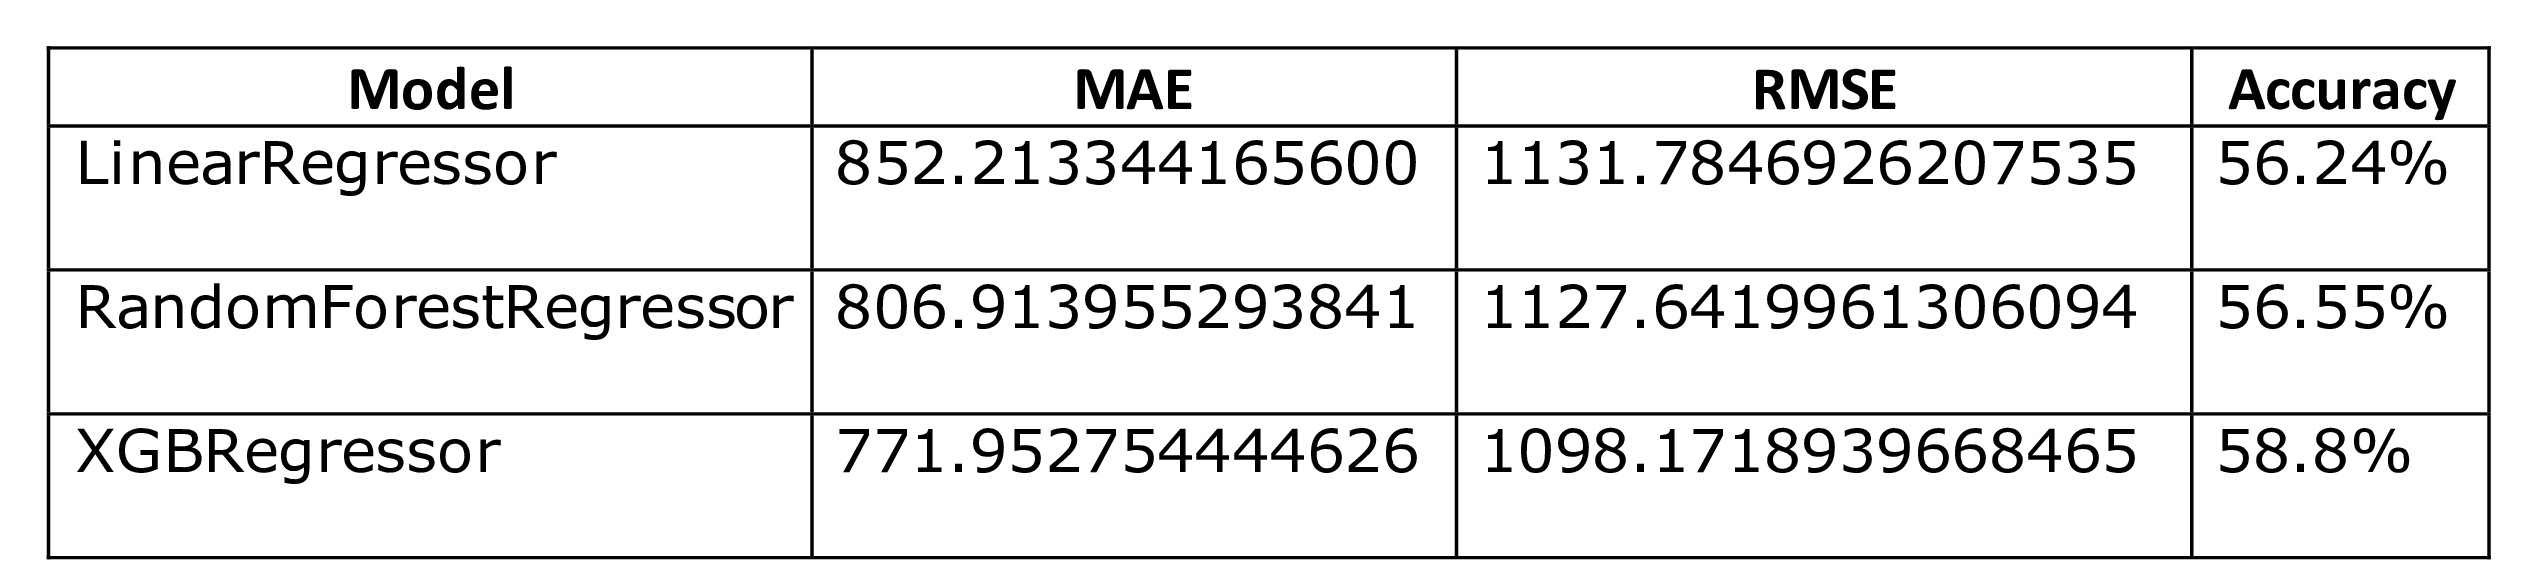